In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.discriminant_analysis
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv("BankNote_Authentication.csv")

In [3]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
print(dataset.shape)

(1372, 5)


In [6]:
print(dataset.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


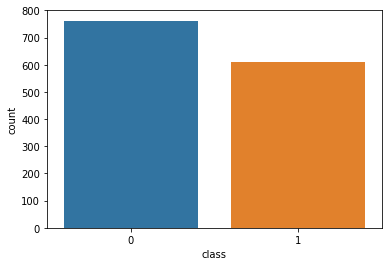

In [7]:
sns.countplot(x = 'class',data=dataset)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scalar = StandardScaler()
scalar.fit(dataset.drop('class',axis=1))
scale_features = scalar.transform(dataset.drop('class',axis = 1))

In [10]:
dataset_prep = pd.DataFrame(scale_features,columns = dataset.columns[:-1])

In [11]:
dataset_prep.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


Splitting my training and testing data

In [12]:
X = dataset_prep

In [13]:
y = dataset['class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
dataset_prep.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [19]:
print(dataset.groupby('class').size())

class
0    762
1    610
dtype: int64


In [20]:
from pandas.plotting import scatter_matrix

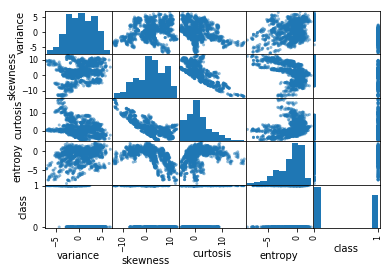

In [21]:
scatter_matrix(dataset)
plt.show()

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


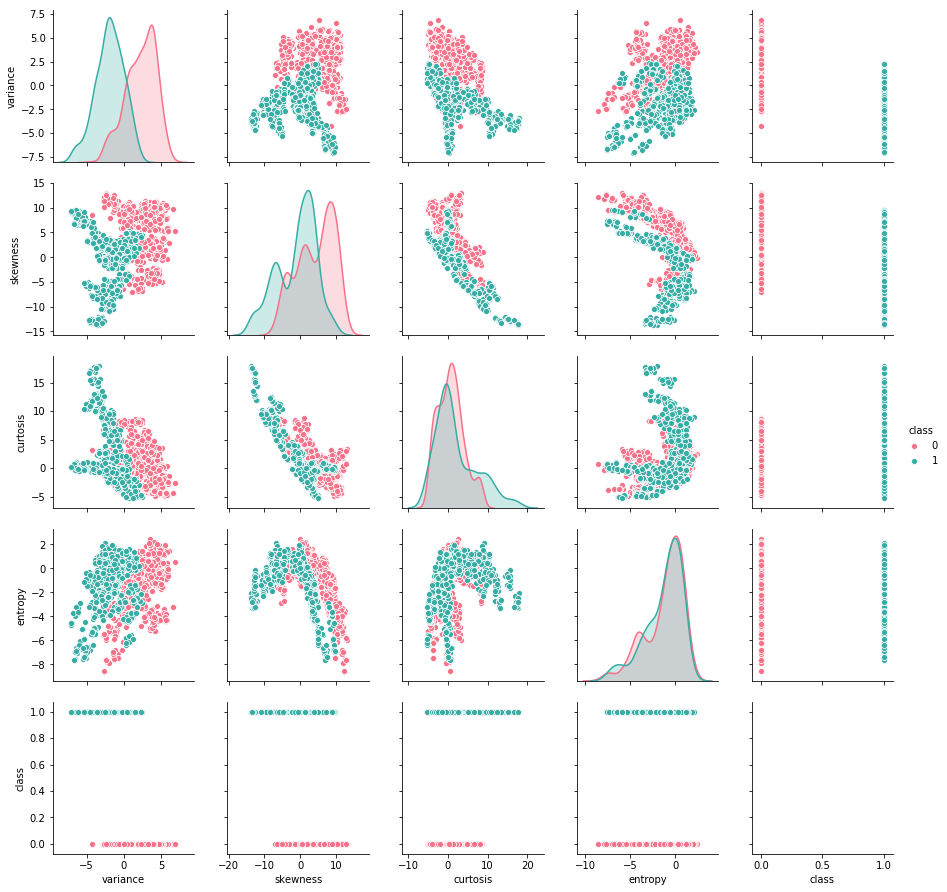

In [75]:
sns.pairplot(dataset, hue="class", palette="husl")

In [23]:
print('Rows: %d' % dataset.shape[0])
print('Cols: %d' % dataset.shape[1])

Rows: 1372
Cols: 5


In [24]:
print('Rows: %d' % dataset_prep.shape[0])
print('Cols: %d' % dataset_prep.shape[1])

Rows: 1372
Cols: 4


In [25]:
dataset_prep.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,variance,skewness,curtosis,entropy
variance,1,0.255126,-0.326704,0.241503
skewness,0.255126,1,-0.729426,-0.57251
curtosis,-0.326704,-0.729426,1,0.433299
entropy,0.241503,-0.57251,0.433299,1


In [26]:
dataset.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,variance,skewness,curtosis,entropy,class
variance,1,0.255126,-0.326704,0.241503,-0.735605
skewness,0.255126,1,-0.729426,-0.57251,-0.429016
curtosis,-0.326704,-0.729426,1,0.433299,0.0615996
entropy,0.241503,-0.57251,0.433299,1,-0.0327505
class,-0.735605,-0.429016,0.0615996,-0.0327505,1


# Dimensionality reduction

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
import time

In [ ]:
pca_results_dataframe = pd.DataFrame(columns = ['Method', 'Algorithm','Total Attributes','True_Negative','False_Positive','False_Negative','True_Positive','Train Time','Test Time']) 

In [30]:
pca_results_dataframe

,Method,Algorithm,Total_Attributes,True_Negative,False_Positive,False_Negative,True_Positive,Train_T,Test_T


In [31]:
typ=[]
typ.append(('Decision Tree',DecisionTreeClassifier()))
typ.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
typ

[('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

In [84]:
pca_results_dataframe = pd.DataFrame(columns =['Method','Algorithm','Total_Attributes','True_Negative','False_Positive','False_Negative','True_Positive','Train_T','Test_T'])
for j,k in typ:
    for i in range(1,4):
        pca = PCA(n_components = i)
        X_pca_random = pca.fit_transform(X)
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_pca_random,y,test_size=0.25,random_state=123)
        Algorithm = k
        Start_train_clock = time.clock()
        Algorithm.fit(Xtrain,Ytrain)
        Time_over_clock = time.clock() - Start_train_clock
        Timing_test = time.clock()
        Yprediction = Algorithm.predict(Xtest)
        Test_time_taken = time.clock() - Start_train_clock
        TN,FP,FN,TP=confusion_matrix(Ytest,Yprediction).ravel()
        Accuracy = accuracy_score(Ytest,Yprediction)
        Test = pd.DataFrame({'Method':['PCA'],'Algorithm':j,'Total_Attributes':i, 'Accuracy':Accuracy,
                         'True_Negative':TN,'False_Positive':FP,'False_Negative':FN,
                         'True_Positive':TP,'Train_T':Time_over_clock,'Test_T':Test_time_taken})
        pca_results_dataframe=pca_results_dataframe.append(Test)
    
        
        
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path

In [85]:
pca_results_dataframe

,Accuracy,Algorithm,False_Negative,False_Positive,Method,Test_T,Total_Attributes,Train_T,True_Negative,True_Positive
0,0.679300,Decision Tree,55,55,PCA,0.010226,1,0.008263,136,97
0,0.862974,Decision Tree,22,25,PCA,0.009371,2,0.007509,166,130
0,0.956268,Decision Tree,7,8,PCA,0.011299,3,0.009322,183,145
0,0.688047,KNN,58,49,PCA,0.082175,1,0.004922,142,94
0,0.880466,KNN,25,16,PCA,0.069797,2,0.011391,175,127
0,0.970845,KNN,3,7,PCA,0.060091,3,0.003633,184,149


In [46]:
bs_results_dataframe = pd.DataFrame(columns =['Method','Algorithm','Total_Attributes','True_Negative','False_Positive','False_Negative','True_Positive','Train_T','Test_T'])
for j,k in typ:
    for i in range(0,4):
        #pca = PCA(n_components = i)
        X_random = X.iloc[:,:4-i]
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_random,y,test_size=0.25,random_state=123)
        Algorithm = k
        Start_train_clock = time.clock()
        Algorithm.fit(Xtrain,Ytrain)
        Time_over_clock = time.clock() - Start_train_clock
        Timing_test = time.clock()
        Yprediction = Algorithm.predict(Xtest)
        Test_time_taken = time.clock() - Start_train_clock
        TN,FP,FN,TP=confusion_matrix(Ytest,Yprediction).ravel()
        Accuracy = accuracy_score(Ytest,Yprediction)
        Test = pd.DataFrame({'Method':['BS'],'Algorithm':j,'Total_Attributes':4-i, 'Accuracy':Accuracy,
                         'True_Negative':TN,'False_Positive':FP,'False_Negative':FN,
                         'True_Positive':TP,'Train_T':Time_over_clock,'Test_T':Test_time_taken})
        bs_results_dataframe=bs_results_dataframe.append(Test)
    
        
        
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path

In [65]:
bs_results_dataframe

,Accuracy,Algorithm,False_Negative,False_Positive,Method,Test_T,Total_Attributes,Train_T,True_Negative,True_Positive
0,0.976676,Decision Tree,5,3,BS,0.006512,4,0.005404,188,147
0,0.988338,Decision Tree,4,0,BS,0.003752,3,0.002654,191,148
0,0.935860,Decision Tree,11,11,BS,0.004363,2,0.003148,180,141
0,0.787172,Decision Tree,39,34,BS,0.003058,1,0.002048,157,113
0,0.997085,KNN,0,1,BS,0.019506,4,0.002681,190,152
0,0.991254,KNN,0,3,BS,0.018460,3,0.001491,188,152
0,0.935860,KNN,11,11,BS,0.015239,2,0.001180,180,141
0,0.825073,KNN,27,33,BS,0.015653,1,0.001605,158,125


In [52]:
Fresults = pd.read_excel("Final Results.xlsx")

In [53]:
Fresults

,Accuracy,Algorithm,Hue,False_Negative,False_Positive,Method,Test_T,Total_Attributes,Train_T,True_Negative,True_Positive
0,0.679300,Decision Tree,1,55,55,PCA,0.012299,1,0.009923,136,97
1,0.865889,Decision Tree,1,20,26,PCA,0.012480,2,0.010495,165,132
2,0.962099,Decision Tree,1,6,7,PCA,0.013413,3,0.010758,184,146
3,0.688047,KNN,2,58,49,PCA,0.080967,1,0.006533,142,94
4,0.880466,KNN,2,25,16,PCA,0.062501,2,0.003536,175,127
5,0.970845,KNN,2,3,7,PCA,0.061454,3,0.003628,184,149
6,0.976676,Decision Tree,3,5,3,BS,0.006512,4,0.005404,188,147
7,0.988338,Decision Tree,3,4,0,BS,0.003752,3,0.002654,191,148
8,0.935860,Decision Tree,3,11,11,BS,0.004363,2,0.003148,180,141
9,0.787172,Decision Tree,3,39,34,BS,0.003058,1,0.002048,157,113


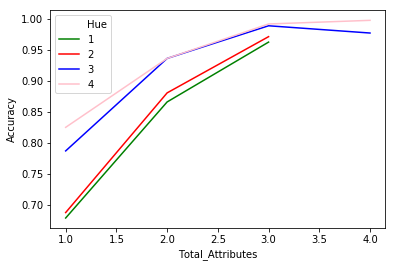

In [56]:
sns.lineplot(x='Total_Attributes',y='Accuracy',data = Fresults,hue ='Hue',palette=['Green','red','blue','pink'])

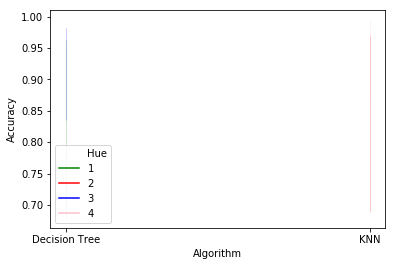

In [76]:
sns.lineplot(x='Algorithm',y='Accuracy',data = Fresults,hue ='Hue',palette=['Green','red','blue','pink'])

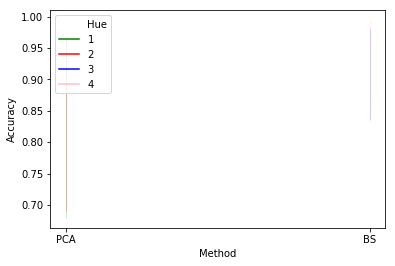

In [77]:
sns.lineplot(x='Method',y='Accuracy',data = Fresults,hue ='Hue',palette=['Green','red','blue','pink'])

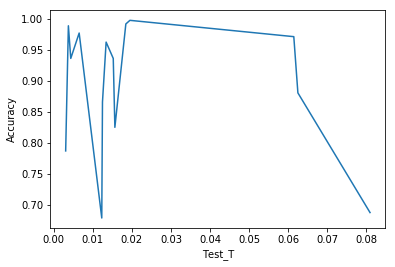

In [80]:
sns.lineplot(x='Test_T',y='Accuracy',data = Fresults)